## Exam 2 Week 11    

### Timothy Schock III.

#### Value 2000 pts

In [145]:
# Import necessary packages
import numpy as np

# Utilty packages
from matplotlib import pyplot as plt
import seaborn as sns
import random 
from scipy import stats
from sklearn.metrics import accuracy_score

# Data management packages
import pandas as pd
import geopandas as gpd
from sklearn.model_selection import train_test_split

# Machine Learning packages
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

# Other packages (define the category however you like) 

### Question 1 (1000 pts)


Classification is a type of supervised machine learning problem where the target (response) variable is categorical. Given the training data, which contains the known label, the classifier approximates a mapping function (f) from the input variables (X) to output variables (y). 

1. Using the statistical and graphical techniques from Cast Study 5, perform an EDA on the Iris dataset with the intention of determining what phenotypic characteristics (meausrements of sepal and petal dimensions) are likely to be most useful in predicting the species of the plant. Support your observations with statistics and graphs. 

2. Build a KNN Classifier in `scikit-learn` that predicts Iris species. Use a training/test split of 70/30. 
    - First, use only the best two measurements to predict the species. Vary the k-value to acquire the best accuracy and the most generalizable model (the k-value at which maximizes both training and test accuracy scores).
    - Next, use all available measurements to predict the species. Vary the k-value as before.
    - Compare and explain the results from the first two parts. For example, you should explain which one did better and whether the k-values the same? If not, why? 

In [146]:
# Provide your answer in cells here and below.

# Load in the data set
iris_data = datasets.load_iris()

# Extract data values and target_name values
iris_df = pd.DataFrame(iris_data["data"], columns = ["sepal_len", "sepal_w", "petal_len", "petal_w"])
target_names = iris_data["target_names"]

# Format the target names for use with the iris_df by repeating each name 50 times 
species_names = np.concatenate([np.repeat(x, 50) for x in target_names])

# Print the shape of species_names
species_names.shape

# Append the new species column 
iris_df["species"] = species_names

# Seperate iris_df into different views for each species to make plotting easier. 
# Don"t append the original index col. to the DataFrame by using drop = True
setosa = iris_df[iris_df["species"] == "setosa"].reset_index(drop = True)
versicolor = iris_df[iris_df["species"] == "versicolor"].reset_index(drop = True)
virginica = iris_df[iris_df["species"] == "virginica"].reset_index(drop = True)

# Show the first five rows to make sure the species column got added properly
iris_df.head()

# Descriptive statistics for the data set
iris_df.describe()

,sepal_len,sepal_w,petal_len,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Histogram and KDE Plot for Petal Length by Species

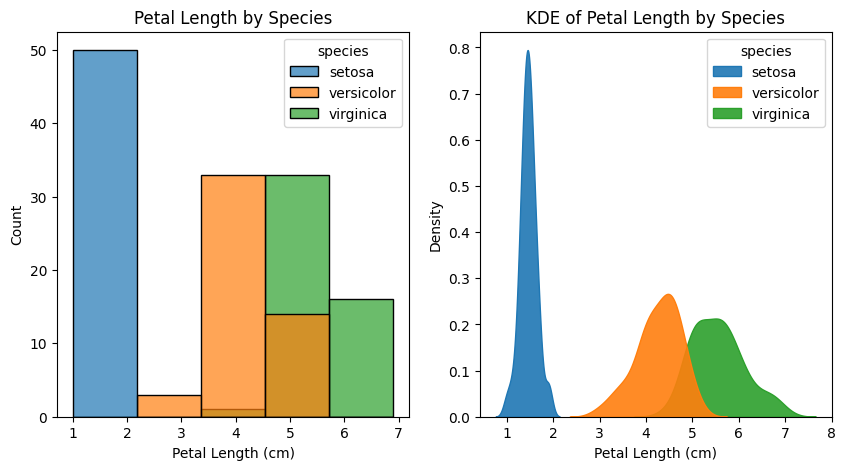

In [147]:
# Create figure and axes to put the histogram and kde plot side-by-side
fig, axs = plt.subplots(1,2, figsize = (10, 5))

# Create histogram and its components
hist_plot = sns.histplot(x = "petal_len", data = iris_df, bins = 5, alpha = .7, hue = "species", legend = True, ax = axs[0])
hist_plot.set_title("Petal Length by Species")
hist_plot.set_xlabel("Petal Length (cm)")

# Create kde plot and its components 
kde_plot = sns.kdeplot(x = "petal_len", data = iris_df, fill = True, alpha = .9, hue = "species", legend = True, ax = axs[1])
kde_plot.set_title("KDE of Petal Length by Species")
kde_plot.set_xlabel("Petal Length (cm)")

# Show
plt.show()

### Histogram and KDE Plot for Sepal Length by Species

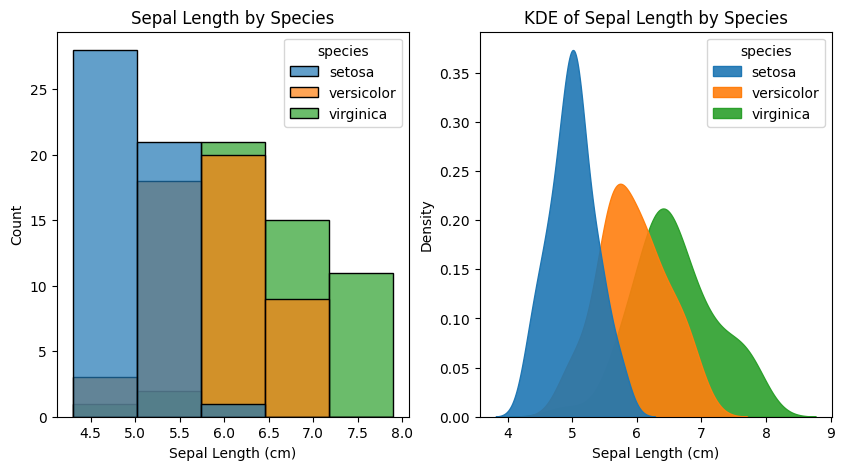

In [148]:
# Create figure and axes to put the histogram and kde plot side-by-side
fig, axs = plt.subplots(1,2, figsize = (10, 5))

# Create histogram and its components
hist_plot = sns.histplot(x = "sepal_len", data = iris_df, bins = 5, alpha = .7, hue = "species", legend = True, ax = axs[0])
hist_plot.set_title("Sepal Length by Species")
hist_plot.set_xlabel("Sepal Length (cm)")

# Create kde plot and its components 
kde_plot = sns.kdeplot(x = "sepal_len", data = iris_df, fill = True, alpha = .9, hue = "species", legend = True, ax = axs[1])
kde_plot.set_title("KDE of Sepal Length by Species")
kde_plot.set_xlabel("Sepal Length (cm)")

# Show
plt.show()

Text(0, 0.5, '')

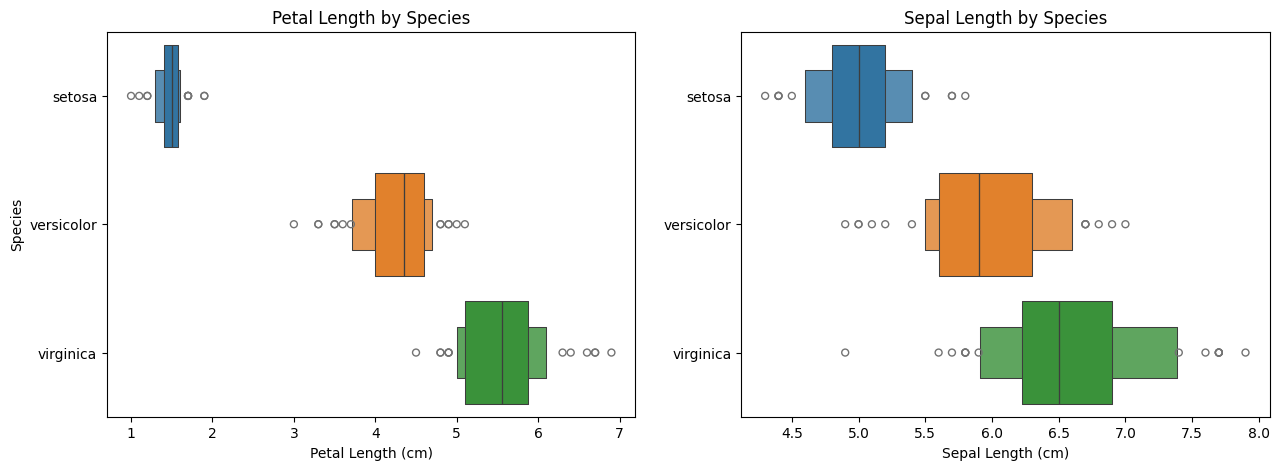

In [149]:
# Create figure and axes to put both boxen plots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Create boxen plot for Petal Length
sns.boxenplot(x="petal_len", y="species", data=iris_df, hue="species", ax=axes[0])
axes[0].set_title("Petal Length by Species")
axes[0].set_xlabel("Petal Length (cm)")
axes[0].set_ylabel("Species")

# Create boxen plot for Sepal Length
sns.boxenplot(x="sepal_len", y="species", data=iris_df, hue="species", ax=axes[1])
axes[1].set_title("Sepal Length by Species")
axes[1].set_xlabel("Sepal Length (cm)")
axes[1].set_ylabel("")

### LMPlot Showing Petal Length v Petal Width for Each Species

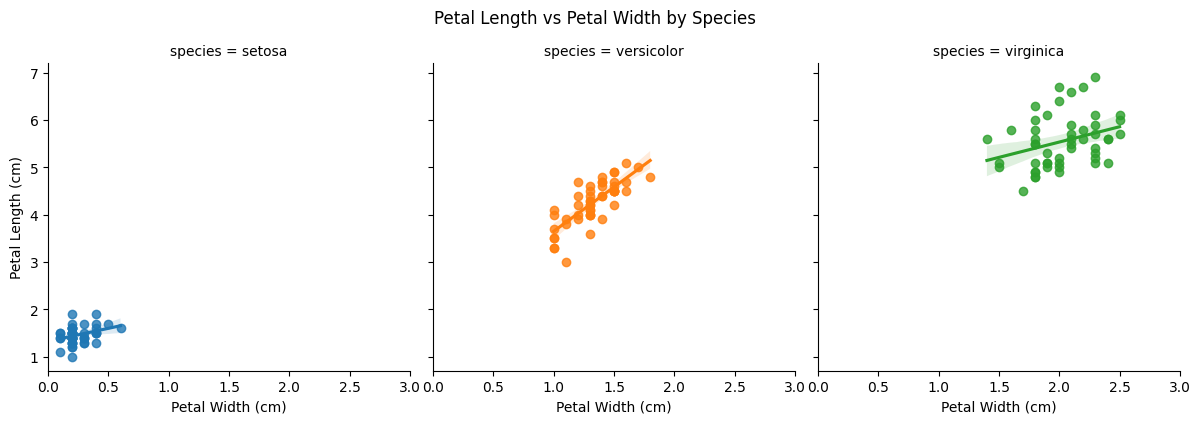

In [150]:
# Create the lmplot
lm_plot = sns.lmplot(x = "petal_w", y = "petal_len", data = iris_df, ci = 95, hue = "species", col = "species", height = 4)

# Set title 
lm_plot.fig.suptitle("Petal Length vs Petal Width by Species", y = 1.05)

# Get the Axes objects
lm_plot_axs = lm_plot.fig.axes

# Adjust the x-axis limits to be between [0,3]. 
# Data points were getting cut off in the left and right-most plots at the default settings. 
# Set other components of the subplots 
[x.set(xlim = (0,3), xlabel = "Petal Width (cm)", ylabel = "Petal Length (cm)") for x in lm_plot_axs]

# Show
plt.show()

### LMPlot Showing Sepal Length v. Sepal Width for Each Species

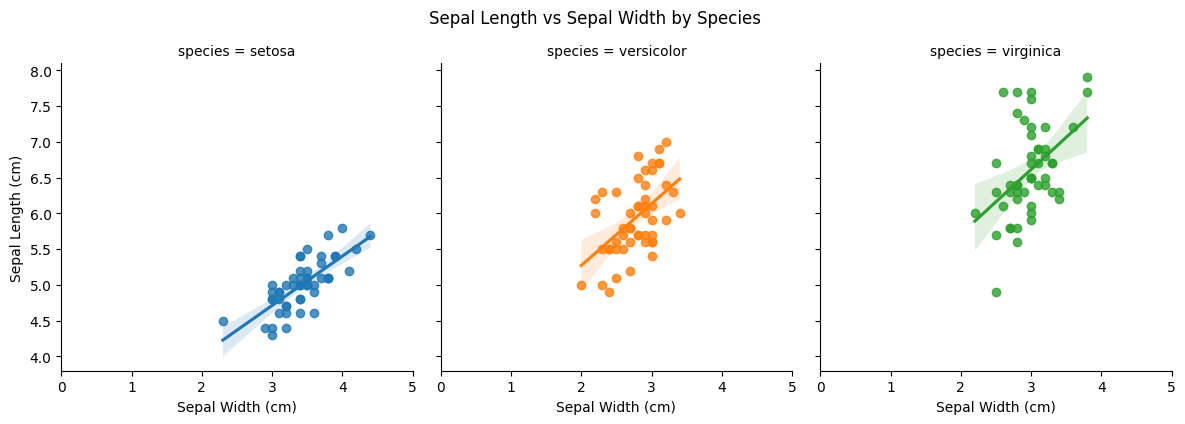

In [151]:
# Create the lmplot
lm_plot = sns.lmplot(x = "sepal_w", y = "sepal_len", data = iris_df, ci = 95, hue = "species", col = "species", height = 4)

# Set title 
lm_plot.fig.suptitle("Sepal Length vs Sepal Width by Species", y = 1.05)

# Get the Axes objects
lm_plot_axs = lm_plot.fig.axes

# Adjust the x-axis limits to be between [0,5]. 
# Data points were getting cut off in the left and right-most plots at the default settings. 
# Set other components of the subplots 
[x.set(xlim = (0,5), xlabel = "Sepal Width (cm)", ylabel = "Sepal Length (cm)") for x in lm_plot_axs]

# Show
plt.show()

### Analysis

 Looking at each of these visualizations, petal length varies much more than sepal length across each species. Setosas have by far the smallest petal lengths, so we can use this insight to predict that plants with smaller petal lengths are more likely to be setosas. Sepal lengths are more consistent across each species, with overlapping values as shown in the KDE plots, so using sepal length is not the most accurate way to predict species. The KDE and LM plots show that setosas seem to be an outlier  in terms of petal length, with lengths much smaller than that of versicolors and virginicas. Looking at the same graphs, virginicas are most likely to have the largest petal and sepal lengths, so  we can use this to predict that plants with larger petal and sepal lengths are more likely to  be virginicas. Lastly, versicolors  seem to have petal lengths that are larger than setosas but smaller than virginicas, so we can predict that plants that have an average petal length and width are more likely to be versicolors. All in all, throughout this EDA, we can use petal length to predict that plants with the smallest petal lenghts are most likely to be setosas, those with the largest petal sizes  are most likely to be virginicas, and those with average petal sizes are most likely to be versicolors. So, petal length is the phenotypic characteristic that is most useful in predicting plant species, with petal width being  the second most useful.


### KNN Classifier for Petal Length and Width

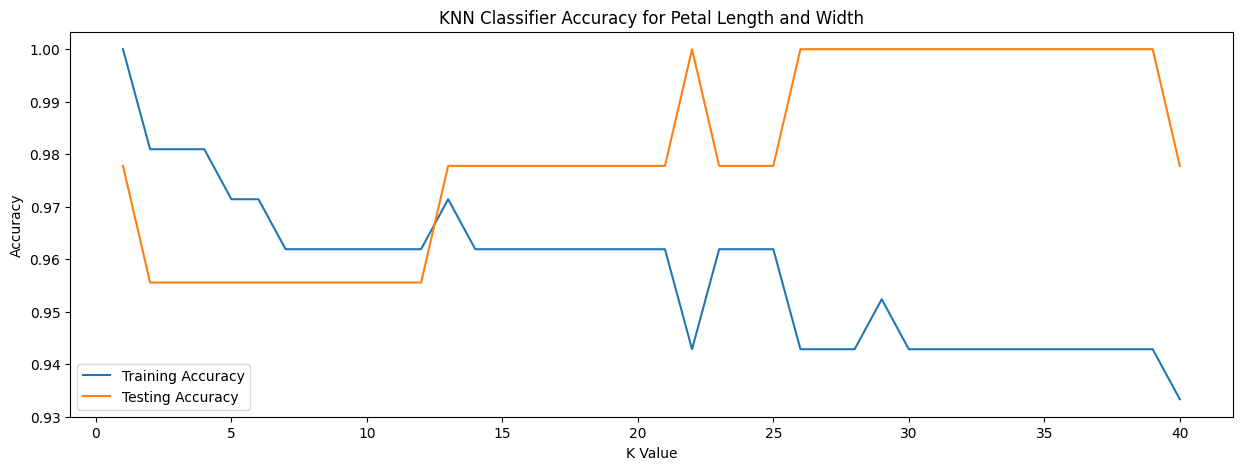

In [152]:
# Select the best two measurements: petal length and petal width
X = iris_df[["petal_len", "petal_w"]]
y = iris_df["species"]

# Looked up how to find the optimal K value: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb
# Split the data into 70/30 training testing splits with random state of 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

# Initialize lists to hold training and testing accuracy
train_accuracy = []
test_accuracy = []

# Vary the k-value from 1 to 40 - the article used this range
k_values = range(1, 41)

# For loop to calculate the accuracy for both training and testing for each k value, storing them in the lists
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training and test accuracy
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test, test_pred))

# Plot the results
plt.figure(figsize = (15, 5))
plt.plot(k_values, train_accuracy, label = "Training Accuracy")
plt.plot(k_values, test_accuracy, label = "Testing Accuracy")
plt.title("KNN Classifier Accuracy for Petal Length and Width")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### KNN Classifier for All Measurements

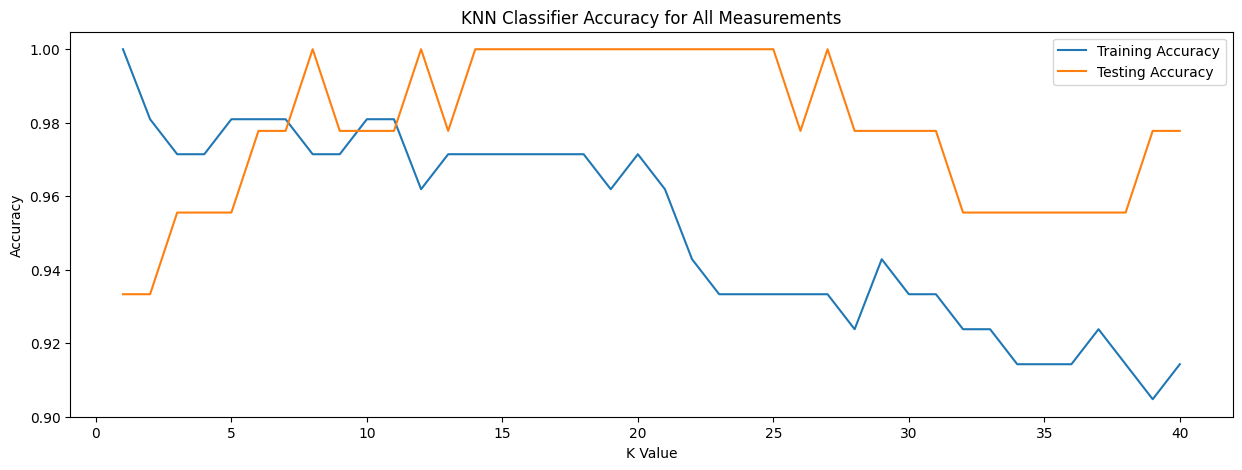

In [153]:
# Use all measurements for x
X_all = iris_df[["petal_len", "petal_w", "sepal_len", "sepal_w"]]

# Split the data into 70/30 training testing splits with random state of 5
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size = 0.3, random_state = 5)

# Initialize lists to hold training and testing accuracies for all features
train_accuracy_all = []
test_accuracy_all = []

# For loop to calculate the accuracy for both training and testing for each k value, storing them in the lists
for k in k_values:
    knn_all = KNeighborsClassifier(n_neighbors=k)
    knn_all.fit(X_train_all, y_train_all)
    
    # Calculate training and test accuracy
    train_pred_all = knn_all.predict(X_train_all)
    test_pred_all = knn_all.predict(X_test_all)
    
    train_accuracy_all.append(accuracy_score(y_train_all, train_pred_all))
    test_accuracy_all.append(accuracy_score(y_test_all, test_pred_all))

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(k_values, train_accuracy_all, label = "Training Accuracy")
plt.plot(k_values, test_accuracy_all, label = "Testing Accuracy")
plt.title("KNN Classifier Accuracy for All Measurements")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Analysis

Looking at both KNN Classifiers, the training accuracy is higher at lower K values which may be due to overfitting, but testing accuracy is higher as the K value increases. In the graph with just petal length and width, the testing accuracy is at 1.0 from K values around 27 to 39, compared to the graph of all measurements, the testing accuracy is at 1.0 from K values around 13 to 24. Based off of this, I would say the KNN classifier with just petal length and width did better, as the range between optimal K values is higher, but both graphs had high testing accuracies. There also seemed to be two overlapping optimal K values at K = 23 and K = 27, as the testing accuracy was at 1.0 for both graphs at these values. Other than those two, there were no other overlapping optimal K values between both graphs. This shows that while both models are effective, the simpler model with just petal length and width may offer a better balance of accuracy and efficiency.



### Question 2 (1000 pts)

In Case Study 6, we explored guage hight and stream flow values captured at 15-minute intervals over a 3-day period. You began by looking at the PMF and CDF of the guage measurements used KDE to understand the flow. In the end, you built a linear regression that uses guage height to predict to streamflow. All of this was based on a random sample of the data.

- Write a `for` loop that extracts a different random sample from the guage data in each iteration and computes PDF, CDF, KDE, and the regression model. Run at least 25 iterations and save the results.
- Run the same analysis as above on the full dataset. 
- Finally, build a plot or series of plots and tables that summarizes the differences between the sample runs and the full datasets. Analyze the results and comment on the differences or lack of differences.
- Explain in your own words why the correlation coefficient between guage height and streamflow is so high. 

In [154]:
# Provide your answer the cells here and below.
# File name - taken from Case Study 6
usgs_fname = "Case-Study-06-main/Data/gage_war_eagle.xlsx"

# Open Excel file using pandas
# Import the Excel spreadsheet using panda"s ExcelFile(). 
usgs_ef = pd.ExcelFile(usgs_fname)

# Load the overview sheet into df
gage_ovr_df = usgs_ef.parse("Overview")

# Load war_eagle_21. Includes air temp data 
we_df = usgs_ef.parse("07049000")

### Run 25 Iterations to Compute PMF, CDF, KDE, and the Regression Model

In [155]:
# Generate a random sample 
we_rnd_df = we_df.sample(n = 100, random_state = 0, axis = 0, ignore_index = True)

# Extract streamflow_cfs and gage_height_ft as Series. 
sflow = we_rnd_df["streamflow_cfs"]
height = we_rnd_df["gage_height_ft"]

# List to store results from multiple iterations
sample_results = []

# Perform the analysis for 25 iterations
for i in range(25):
    # Generate a random sample, random state not defined so it changes each iteration
    we_rnd_df = we_df.sample(n = 100, random_state = i) 
    
    # Extract streamflow and gauge height
    sflow = we_rnd_df["streamflow_cfs"]
    height = we_rnd_df["gage_height_ft"]
    
    # Calculate correlation coefficient
    correlation = height.corr(sflow)
    
    # PMF Calculation
    # Round the values to integers
    sflow_int = sflow.round()
    # Store results as DataFrame 
    sflow_counts = sflow_int.value_counts().reset_index()
    sflow_counts.columns = ["sflow_orig", "sflow_counts"]
    sflow_counts["prob"] = sflow_counts["sflow_counts"] / sflow_counts["sflow_counts"].sum()
    
    # CDF Calculation
    sflow_counts["cdf"] = sflow_counts["prob"].cumsum()
    
    # KDE Calculation - asked ChatGPT "how do i calculate and store the actual kde values"
    kde = stats.gaussian_kde(sflow)  # Calculate KDE
    kde_values = kde(np.linspace(sflow.min(), sflow.max(), 100)) 
    
    # Linear Regression using stats.linregress
    result = stats.linregress(height, sflow)

    # Store the sample results in a dictionary
    sample_results.append({
        "sflow_counts": sflow_counts,
        "kde_values": kde_values,
        "linear_regression": result,
        "correlation": correlation
    })

# Print out sample_results although it does look strange
print(sample_results)

[{'sflow_counts':    sflow_orig  sflow_counts  prob   cdf
0        32.0            40  0.40  0.40
1        33.0            25  0.25  0.65
2        30.0            15  0.15  0.80
3        31.0            13  0.13  0.93
4        29.0             4  0.04  0.97
5        34.0             3  0.03  1.00, 'kde_values': array([0.07158809, 0.0765144 , 0.08146764, 0.08643259, 0.09139575,
       0.09634515, 0.10126995, 0.10615992, 0.11100485, 0.1157939 ,
       0.12051497, 0.12515408, 0.12969477, 0.13411776, 0.13840058,
       0.14251755, 0.14643989, 0.15013613, 0.15357273, 0.15671507,
       0.15952868, 0.16198074, 0.16404184, 0.16568795, 0.16690255,
       0.16767873, 0.16802138, 0.16794902, 0.16749549, 0.16671106,
       0.165663  , 0.16443546, 0.16312845, 0.16185599, 0.16074339,
       0.15992359, 0.15953277, 0.1597054 , 0.16056873, 0.16223728,
       0.16480736, 0.168352  , 0.17291664, 0.17851573, 0.18513061,
       0.19270868, 0.20116401, 0.21037947, 0.22021017, 0.23048815,
       0.24102802

### Same Thing for the Whole Dataset

In [156]:
# Create empty list to store results
full_results = []

# Extract streamflow and gauge height from the full dataset
sflow_full = we_df["streamflow_cfs"]
height_full = we_df["gage_height_ft"]

# Calculate correlation coefficient
correlation_full = height_full.corr(sflow_full)

# PMF Calculation for the full dataset
sflow_int_full = sflow_full.round()
sflow_counts_full = sflow_int_full.value_counts().reset_index()
sflow_counts_full.columns = ["sflow_orig", "sflow_counts"]
sflow_counts_full["prob"] = sflow_counts_full["sflow_counts"] / sflow_counts_full["sflow_counts"].sum()

# CDF Calculation for the full dataset
sflow_counts_full["cdf"] = sflow_counts_full["prob"].cumsum()

# KDE Calculation for the full dataset - Same ChatGPT code
kde_full = stats.gaussian_kde(sflow_full)
kde_values_full = kde_full(np.linspace(sflow_full.min(), sflow_full.max(), 100))

# Linear Regression using stats.linregress for the full dataset
result_full = stats.linregress(height_full, sflow_full)

# Store full dataset results as a dictionary
full_results.append({
    "sflow_counts": sflow_counts_full,
    "kde_values": kde_values_full,
    "correlation": correlation_full,
    "linear_regression": result_full
})

# Print out the full results - also looks strange
print(full_results)

[{'sflow_counts':    sflow_orig  sflow_counts      prob       cdf
0        32.0            73  0.392473  0.392473
1        33.0            44  0.236559  0.629032
2        30.0            31  0.166667  0.795699
3        31.0            21  0.112903  0.908602
4        29.0            11  0.059140  0.967742
5        34.0             6  0.032258  1.000000, 'kde_values': array([0.09322062, 0.09883165, 0.10428206, 0.10955202, 0.1146282 ,
       0.11950301, 0.12417332, 0.1286391 , 0.13290183, 0.13696295,
       0.14082244, 0.14447758, 0.14792202, 0.15114516, 0.15413199,
       0.15686321, 0.15931576, 0.16146372, 0.16327943, 0.16473486,
       0.16580322, 0.16646057, 0.16668764, 0.16647158, 0.16580779,
       0.16470157, 0.16316982, 0.16124243, 0.1589636 , 0.15639268,
       0.15360473, 0.1506905 , 0.14775578, 0.14492006, 0.14231442,
       0.14007851, 0.1383569 , 0.13729453, 0.13703172, 0.1376987 ,
       0.13941006, 0.14225932, 0.14631396, 0.15161121, 0.15815477,
       0.16591289, 0.1748177

### Line Graph to Compare Sample and Full Dataset PMF and CDF

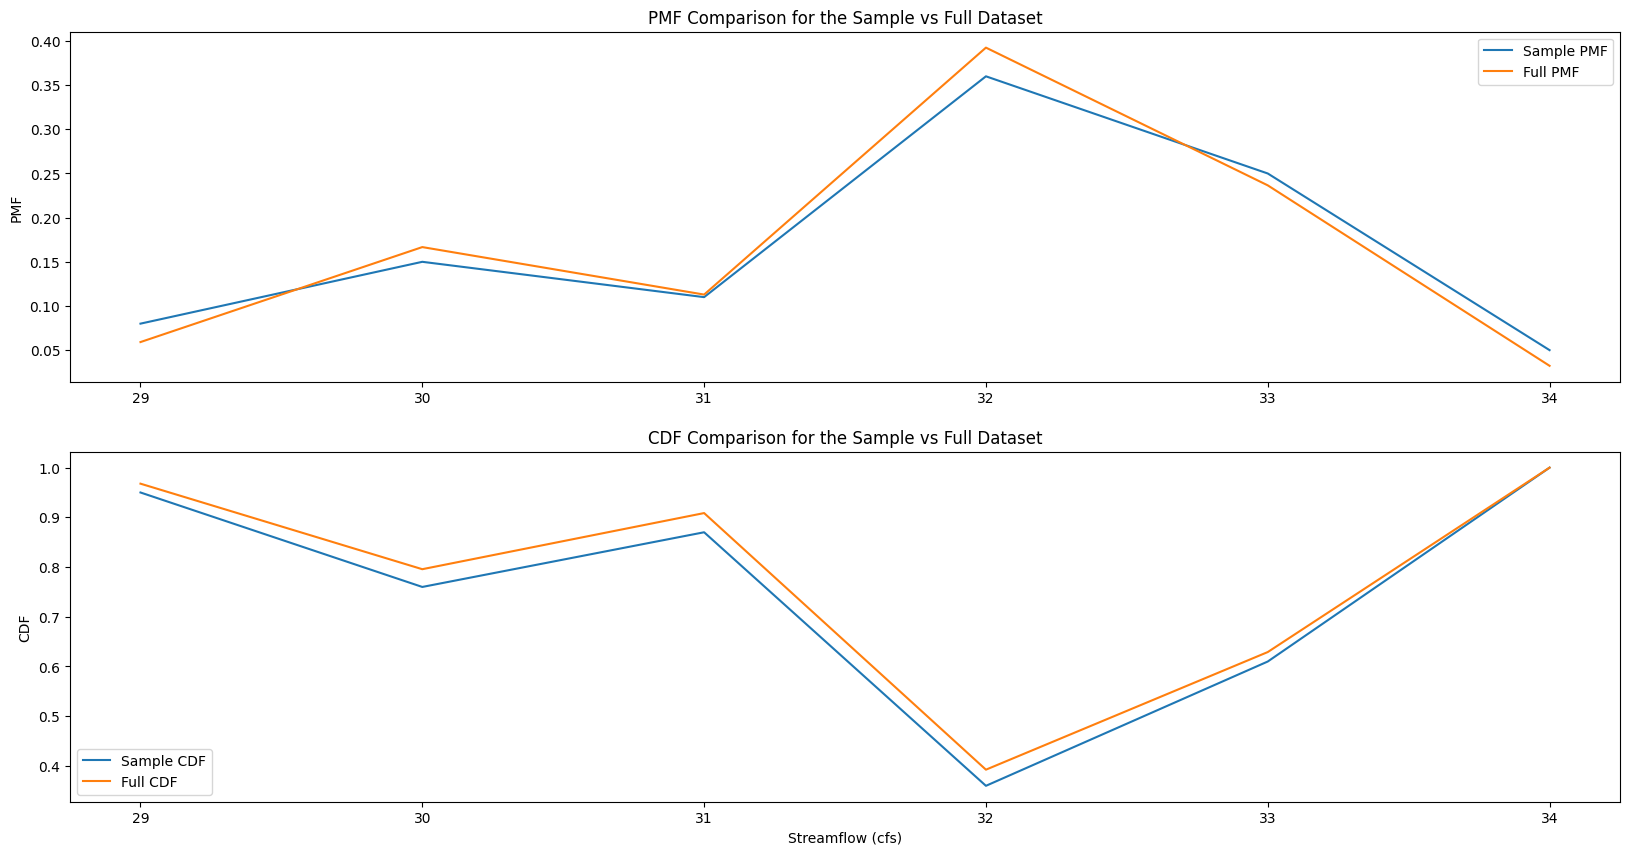

In [157]:
# Define sample pmf and cmf for graphing
sample_pmf = sflow_counts[["sflow_orig", "prob"]]
sample_cmf = sflow_counts[["sflow_orig", "cdf"]]

# Create subplots for PMF and CDF
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

# Plot PMF
sns.lineplot(x = "sflow_orig", y = "prob", data = sample_pmf, ax = axes[0], label = "Sample PMF")
sns.lineplot(x = "sflow_orig", y = "prob", data = sflow_counts_full, ax = axes[0], label = "Full PMF")
axes[0].set_title("PMF Comparison for the Sample vs Full Dataset")
axes[0].set_xlabel("")
axes[0].set_ylabel("PMF")
axes[0].legend()

# Plot CDF
sns.lineplot(x = "sflow_orig", y = "cdf", data = sample_cmf, ax = axes[1], label = "Sample CDF")
sns.lineplot(x = "sflow_orig", y = "cdf", data = sflow_counts_full, ax = axes[1], label = "Full CDF")
axes[1].set_title("CDF Comparison for the Sample vs Full Dataset")
axes[1].set_xlabel("Streamflow (cfs)")
axes[1].set_ylabel("CDF")
axes[1].legend()

# Show the plots
plt.show()

### Analysis

There is a slight difference between the sample and full dataset for both the PMF and CDF which may be due to a vast difference in sample size. The sample run had 100 rows of data, which is way less than the full dataset, which would make the PMF and CDF calculations differ.

### Density Plot between Sample and Full Dataset for Streamflow and Gauge Height

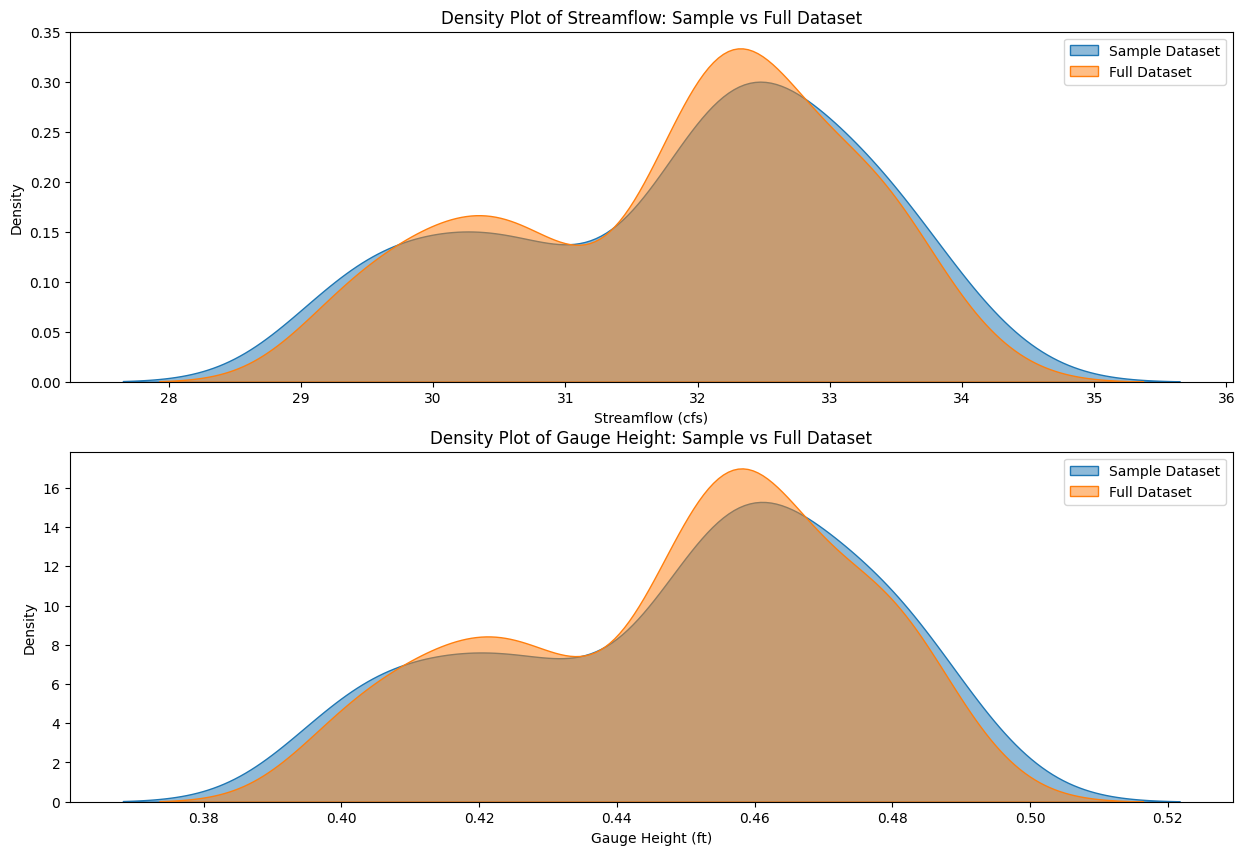

In [158]:
# Create a 2-row subplot
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# First subplot: Density plot of Streamflow
sns.kdeplot(sflow, label = "Sample Dataset", fill = True, alpha  = 0.5, ax = axs[0])
sns.kdeplot(sflow_full, label = "Full Dataset", fill  = True, alpha  = 0.5, ax = axs[0])
axs[0].set_title("Density Plot of Streamflow: Sample vs Full Dataset")
axs[0].set_xlabel("Streamflow (cfs)")
axs[0].set_ylabel("Density")
axs[0].legend()

# Second subplot: Density plot of Gauge Height
sns.kdeplot(height, label = "Sample Dataset", fill = True, alpha = 0.5, ax = axs[1])
sns.kdeplot(height_full, label = "Full Dataset", fill = True, alpha = 0.5, ax = axs[1])
axs[1].set_title("Density Plot of Gauge Height: Sample vs Full Dataset")
axs[1].set_xlabel("Gauge Height (ft)")
axs[1].set_ylabel("Density")
axs[1].legend()

### Analysis

Once again there is a slight difference between the sample runs and the full dataset which is also due to a difference in sample size. The sample runs had a much smaller sample size than the full dataset, so the densities between the sample run and full dataset are not identical.

### Compare Correlation Coefficients Between Gauge Height and Streamflow for the Sample and Full Dataset

In [159]:
# Print each correlation coefficient
print("The sample's correlation coefficient is " +  str(correlation))
print("The full dataset's correlation coefficient is " + str(correlation_full))

The sample's correlation coefficient is 0.9998351652993014
The full dataset's correlation coefficient is 0.9998215864982373


### Analysis

Looking at both correlation coefficients between gauge height and stream flow, they both are around 0.999. This is so high because the higher the gauge height or the height of the water, the faster water will flow. This means that there is an extremely strong positive correlation between gauge height and stream flow as an increase in gauge height causes an increase in streamflow. The deeper the river or stream, the faster its current flows, which is why the correlation coeffecient is so high.